<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Convolutional_Neural_Network_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

Load a pretrained network from TensorFlow Hub, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
logits = module(images)  # Logits with shape [batch_size, num_classes].
```

Apply it to classify the images downloaded below (images from a search for animals in national parks):

In [1]:
!pip install google_images_download

In [2]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 1.maxresdefault.jpg
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2017/06/Royal-Bengal-Tiger.jpg
Completed Image ====> 3.Royal-Bengal-Tiger.jpg
Image URL: https://k6u8v6y8.stackpathcdn.com/blog/wp-content/uploads/2014/04/national-parks-and-wildlife-sanctuaries-in-india.png
Completed Image ====> 4.national-parks-and-wildlife-sanctuaries-in-india.png
Image URL: https://www.nps.gov/arch/learn/nature/images/ARK_6.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 5.ARK_6.jpg
Image URL: https://www.nps.gov/voya/learn/nature/images/VOYA_web_deer.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Compl

In [3]:
absolute_image_paths

({'animal national park': ['/content/downloads/animal national park/1.maxresdefault.jpg',
   '/content/downloads/animal national park/2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
   '/content/downloads/animal national park/3.Royal-Bengal-Tiger.jpg',
   '/content/downloads/animal national park/4.national-parks-and-wildlife-sanctuaries-in-india.png',
   '/content/downloads/animal national park/5.ARK_6.jpg',
   '/content/downloads/animal national park/6.VOYA_web_deer.jpg',
   '/content/downloads/animal national park/7.Best-National-Parks-In-USA-For-Wildlife-Watching.jpg',
   '/content/downloads/animal national park/8.addo-elephant-national-park-elephants-590x390.jpg',
   '/content/downloads/animal national park/9.zebras-in-kidepo-750x450.jpg',
   '/content/downloads/animal national park/10.2014-06-03-ChitwanNationalParkOlance.jpg',
   '/content/downloads/animal national park/11.spot-denali-national-parks-animals.jpg',
   '/content/downloads/animal national park/12.nairobi-national-

In [0]:
images = absolute_image_paths[0]['animal national park']

Report both the most likely estimated class for any image, and also investigate (a) images where the classifier isn't that certain (the best estimate is low), and (b) images where the classifier fails.

Answer (in writing in the notebook) the following - "What sorts of images do CNN classifiers do well with? What sorts do they not do so well? And what are your hypotheses for why?"

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.measure import ransac
from skimage.transform import AffineTransform
import tensorflow as tf
import tensorflow_hub as hub

In [0]:
def resize_image(filename, new_width=224, new_height=224):
  pil_image = Image.open(filename)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert('RGB')
  pil_image_rgb.save(filename, format='JPEG', quality=90)

def show_images(image_path_list):
  plt.figure()
  for i, image_path in enumerate(image_path_list):
    plt.subplot(1, len(image_path_list), i+1)
    plt.imshow(np.asarray(Image.open(image_path)))
    plt.title(image_path)
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
  plt.show();

In [0]:
for i in images:
  resize_image(i)

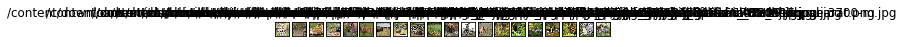

In [8]:
show_images(images)

In [9]:
!pip install tensorflow-hub

In [0]:
import tensorflow as tf
import tensorflow_hub as hub

In [0]:
labels_file = """https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"""

In [0]:
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
#images = [batch_size, height, width, 3] # A batch of images with shape 
#logits = module(images)  # Logits with shape [batch_size, num_classes].


In [13]:
import numpy as np

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_banana(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'bald eagle':
      return entry[2]
  return 0.0

Using TensorFlow backend.


## Dumb Way

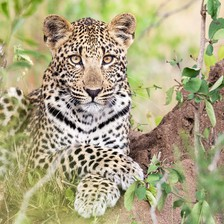

In [14]:
from IPython.display import Image
Image(filename=images[0], width=600)

In [15]:
img_contains_banana(process_img_path(images[0]))

W0723 21:43:38.344300 139804532533120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 21:43:38.346201 139804532533120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 21:43:38.354436 139804532533120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0723 21:43:38.390704 139804532533120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0723 21:43:38.391932

[('n02128385', 'leopard', 0.89836097), ('n02128925', 'jaguar', 0.09962634), ('n02130308', 'cheetah', 0.00080419536)]


0.0

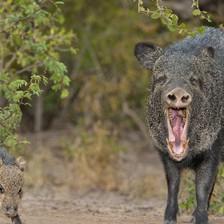

In [16]:
Image(filename=images[1], width=600)

In [17]:
img_contains_banana(process_img_path(images[1]))

[('n02396427', 'wild_boar', 0.2997366), ('n02114367', 'timber_wolf', 0.27000064), ('n02114712', 'red_wolf', 0.14257835)]


0.0

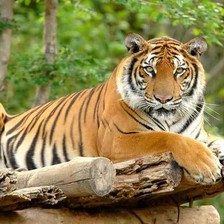

In [18]:
Image(filename=images[2], width=600)

In [19]:
img_contains_banana(process_img_path(images[2]))

[('n02129604', 'tiger', 0.9026125), ('n02123159', 'tiger_cat', 0.09526022), ('n02128925', 'jaguar', 0.0011419763)]


0.0

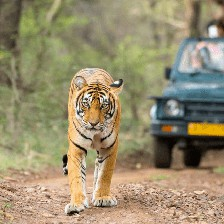

In [20]:
Image(filename=images[3], width=600)

In [21]:
img_contains_banana(process_img_path(images[3]))

[('n02129604', 'tiger', 0.9437708), ('n02123159', 'tiger_cat', 0.039014637), ('n02128925', 'jaguar', 0.0045263013)]


0.0

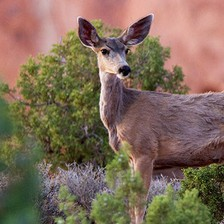

In [22]:
Image(filename=images[4], width=600)

In [23]:
img_contains_banana(process_img_path(images[4]))

[('n02422699', 'impala', 0.3114395), ('n02415577', 'bighorn', 0.26446557), ('n02423022', 'gazelle', 0.20629606)]


0.0

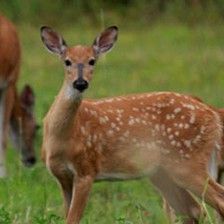

In [24]:
Image(filename=images[5], width=600)

In [25]:
img_contains_banana(process_img_path(images[5]))

[('n02423022', 'gazelle', 0.5525781), ('n02422699', 'impala', 0.3647991), ('n02417914', 'ibex', 0.011889504)]


0.0

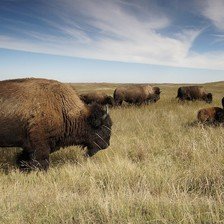

In [26]:
Image(filename=images[6], width=600)

In [27]:
img_contains_banana(process_img_path(images[6]))

[('n02410509', 'bison', 0.99990463), ('n02408429', 'water_buffalo', 5.7601006e-05), ('n02403003', 'ox', 1.5493879e-05)]


0.0

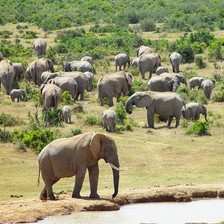

In [28]:
Image(filename=images[7], width=600)

In [29]:
img_contains_banana(process_img_path(images[7]))

[('n02504458', 'African_elephant', 0.9932847), ('n02504013', 'Indian_elephant', 0.0048848703), ('n01871265', 'tusker', 0.0018165001)]


0.0

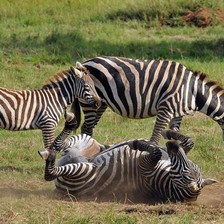

In [30]:
Image(filename=images[8], width=600)

In [31]:
img_contains_banana(process_img_path(images[8]))

[('n02391049', 'zebra', 0.99980325), ('n01798484', 'prairie_chicken', 3.6238176e-05), ('n02422106', 'hartebeest', 2.3718978e-05)]


0.0

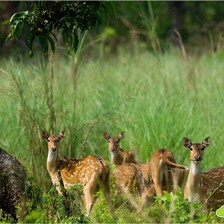

In [32]:
Image(filename=images[9], width=600)

In [33]:
img_contains_banana(process_img_path(images[9]))

[('n02115913', 'dhole', 0.65534484), ('n02422699', 'impala', 0.0497728), ('n02117135', 'hyena', 0.0381103)]


0.0

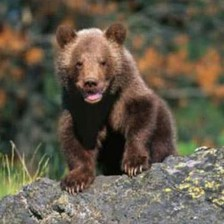

In [34]:
Image(filename=images[10], width=600)

In [35]:
img_contains_banana(process_img_path(images[10]))

[('n02132136', 'brown_bear', 0.98343855), ('n02133161', 'American_black_bear', 0.014101892), ('n02134418', 'sloth_bear', 0.0019517605)]


0.0

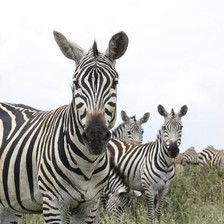

In [36]:
Image(filename=images[11], width=600)

In [37]:
img_contains_banana(process_img_path(images[11]))

[('n02391049', 'zebra', 0.99997413), ('n02129604', 'tiger', 6.891114e-06), ('n02422106', 'hartebeest', 4.2262313e-06)]


0.0

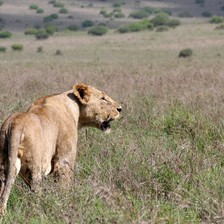

In [38]:
Image(filename=images[12], width=600)

In [39]:
img_contains_banana(process_img_path(images[12]))

[('n02129165', 'lion', 0.9995403), ('n02117135', 'hyena', 0.00027116013), ('n02130308', 'cheetah', 7.686819e-05)]


0.0

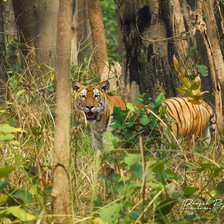

In [40]:
Image(filename=images[13], width=600)

In [41]:
img_contains_banana(process_img_path(images[13]))

[('n02129604', 'tiger', 0.97992253), ('n02123159', 'tiger_cat', 0.02003781), ('n02128925', 'jaguar', 3.107125e-05)]


0.0

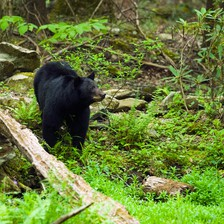

In [42]:
Image(filename=images[14], width=600)

In [43]:
img_contains_banana(process_img_path(images[14]))

[('n02133161', 'American_black_bear', 0.8973887), ('n02134418', 'sloth_bear', 0.091246806), ('n02481823', 'chimpanzee', 0.009355237)]


0.0

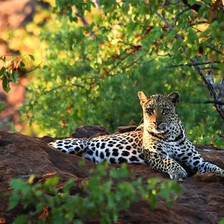

In [44]:
Image(filename=images[15], width=600)

In [45]:
img_contains_banana(process_img_path(images[15]))

[('n02128385', 'leopard', 0.85089374), ('n02128925', 'jaguar', 0.12792134), ('n02130308', 'cheetah', 0.017340377)]


0.0

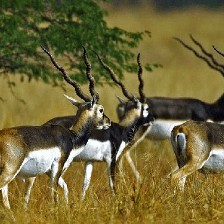

In [46]:
Image(filename=images[16], width=600)

In [47]:
img_contains_banana(process_img_path(images[16]))

[('n02423022', 'gazelle', 0.938825), ('n02422699', 'impala', 0.058717873), ('n02422106', 'hartebeest', 0.0023013896)]


0.0

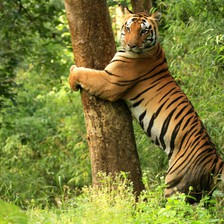

In [48]:
Image(filename=images[17], width=600)

In [49]:
img_contains_banana(process_img_path(images[17]))

[('n02129604', 'tiger', 0.661788), ('n02123159', 'tiger_cat', 0.33782518), ('n02391049', 'zebra', 0.00028731025)]


0.0

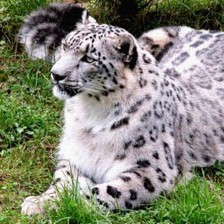

In [50]:
Image(filename=images[18], width=600)

In [51]:
img_contains_banana(process_img_path(images[18]))

[('n02128757', 'snow_leopard', 0.9188794), ('n02128385', 'leopard', 0.073564455), ('n02130308', 'cheetah', 0.0029810288)]


0.0

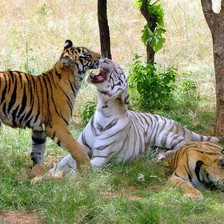

In [52]:
Image(filename=images[19], width=600)

In [53]:
img_contains_banana(process_img_path(images[19]))

[('n02129604', 'tiger', 0.9400673), ('n02123159', 'tiger_cat', 0.059900228), ('n02391049', 'zebra', 2.930664e-05)]


0.0

## Smart Way

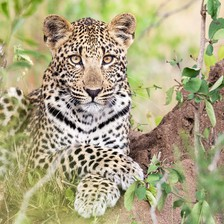

[('n02128385', 'leopard', 0.89836097), ('n02128925', 'jaguar', 0.09962634), ('n02130308', 'cheetah', 0.00080419536)]


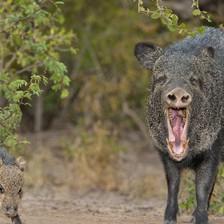

[('n02396427', 'wild_boar', 0.2997366), ('n02114367', 'timber_wolf', 0.27000064), ('n02114712', 'red_wolf', 0.14257835)]


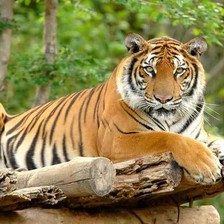

[('n02129604', 'tiger', 0.9026125), ('n02123159', 'tiger_cat', 0.09526022), ('n02128925', 'jaguar', 0.0011419763)]


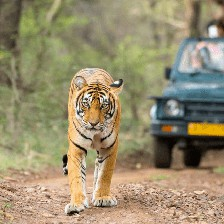

[('n02129604', 'tiger', 0.9437708), ('n02123159', 'tiger_cat', 0.039014637), ('n02128925', 'jaguar', 0.0045263013)]


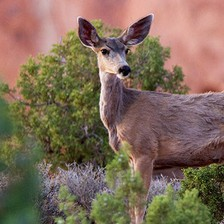

[('n02422699', 'impala', 0.3114395), ('n02415577', 'bighorn', 0.26446557), ('n02423022', 'gazelle', 0.20629606)]


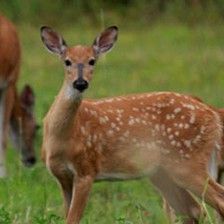

[('n02423022', 'gazelle', 0.5525781), ('n02422699', 'impala', 0.3647991), ('n02417914', 'ibex', 0.011889504)]


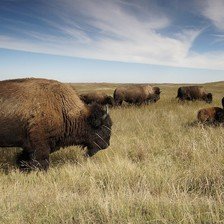

[('n02410509', 'bison', 0.99990463), ('n02408429', 'water_buffalo', 5.7601006e-05), ('n02403003', 'ox', 1.5493879e-05)]


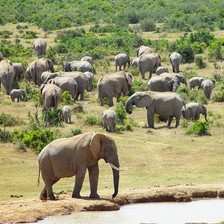

[('n02504458', 'African_elephant', 0.9932847), ('n02504013', 'Indian_elephant', 0.0048848703), ('n01871265', 'tusker', 0.0018165001)]


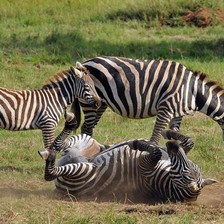

[('n02391049', 'zebra', 0.99980325), ('n01798484', 'prairie_chicken', 3.6238176e-05), ('n02422106', 'hartebeest', 2.3718978e-05)]


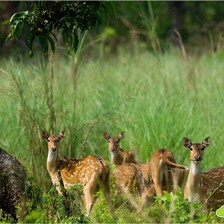

[('n02115913', 'dhole', 0.65534484), ('n02422699', 'impala', 0.0497728), ('n02117135', 'hyena', 0.0381103)]


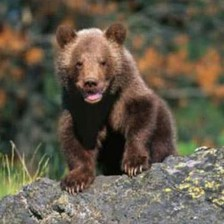

[('n02132136', 'brown_bear', 0.98343855), ('n02133161', 'American_black_bear', 0.014101892), ('n02134418', 'sloth_bear', 0.0019517605)]


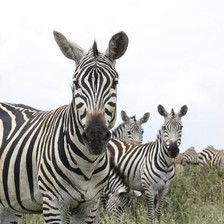

[('n02391049', 'zebra', 0.99997413), ('n02129604', 'tiger', 6.891114e-06), ('n02422106', 'hartebeest', 4.2262313e-06)]


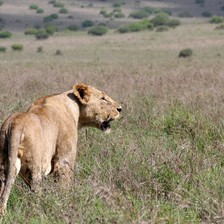

[('n02129165', 'lion', 0.9995403), ('n02117135', 'hyena', 0.00027116013), ('n02130308', 'cheetah', 7.686819e-05)]


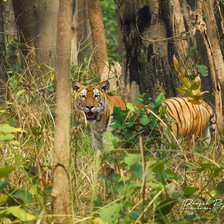

[('n02129604', 'tiger', 0.97992253), ('n02123159', 'tiger_cat', 0.02003781), ('n02128925', 'jaguar', 3.107125e-05)]


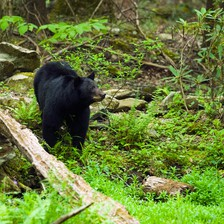

[('n02133161', 'American_black_bear', 0.8973887), ('n02134418', 'sloth_bear', 0.091246806), ('n02481823', 'chimpanzee', 0.009355237)]


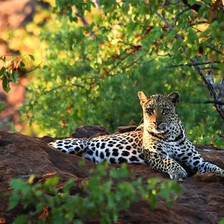

[('n02128385', 'leopard', 0.85089374), ('n02128925', 'jaguar', 0.12792134), ('n02130308', 'cheetah', 0.017340377)]


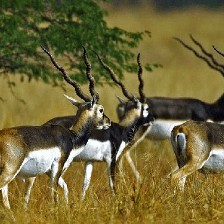

[('n02423022', 'gazelle', 0.938825), ('n02422699', 'impala', 0.058717873), ('n02422106', 'hartebeest', 0.0023013896)]


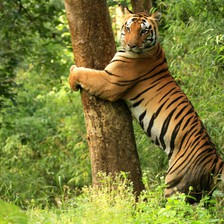

[('n02129604', 'tiger', 0.661788), ('n02123159', 'tiger_cat', 0.33782518), ('n02391049', 'zebra', 0.00028731025)]


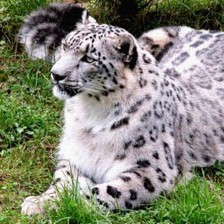

[('n02128757', 'snow_leopard', 0.9188794), ('n02128385', 'leopard', 0.073564455), ('n02130308', 'cheetah', 0.0029810288)]


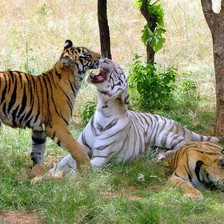

[('n02129604', 'tiger', 0.9400673), ('n02123159', 'tiger_cat', 0.059900228), ('n02391049', 'zebra', 2.930664e-05)]


In [54]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_list_predict(img_list):
  
  model = ResNet50(weights='imagenet')
  
  unmatched = []
  
  for img_url in img_list:
    display(Image(filename=img_url, width=600))
    img = process_img_path(img_url)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    if(results[0][2] <= 0.7):
      unmatched.append((img_url, results))
    print(results)
  return unmatched

images = absolute_image_paths[0]['animal national park']
unmatched = img_list_predict(images)

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language